# Análisis de Tiempos de respuesta

Análisis Por tamaño de datos

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [7]:
logs = pd.read_csv("/home/jimenamr/proyecto-2-bd2/analisis/log.csv")
logs_multimedia = pd.read_csv("/home/jimenamr/proyecto-2-bd2/analisis/logs_multimedia.csv")

In [9]:
logs["origen"] = "texto"
logs_multimedia["origen"] = "audio"
logs["fecha"] = pd.to_datetime(logs["fecha"])

df_total = pd.concat([logs, logs_multimedia], ignore_index=True)
df_total.head()

,tabla,tiempo_respuesta,query_text,top_k,fecha,origen,metodo
0,spotify_3k,56.70,love,5.0,2025-07-15 01:09:50,texto,NaN
1,spotify_3k,27.17,love,5.0,2025-07-15 01:09:50,texto,NaN
2,spotify_3k,24.94,love,5.0,2025-07-15 01:10:27,texto,NaN
3,spotify_3k,26.36,love,5.0,2025-07-15 01:10:27,texto,NaN
4,spotify_3k,32.24,love,5.0,2025-07-15 01:10:40,texto,NaN


In [10]:
agg_stats = df_total.groupby(["origen", "query_text"])["tiempo_respuesta"].agg(["count", "mean", "std", "min", "max"]).reset_index()
agg_stats

,origen,query_text,count,mean,std,min,max
0,texto,2,2,1918.245000,1699.029103,716.85,3119.64
1,texto,again,2,99.665000,97.517096,30.71,168.62
2,texto,heart,6,233.078333,160.216892,24.04,371.08
3,texto,heaven,4,5893.907500,5342.602482,2854.42,13897.90
4,texto,kiss,4,46.590000,32.047707,20.15,85.60
5,texto,know,2,804.880000,330.473425,571.20,1038.56
6,texto,love,52,4865.452308,8830.330520,20.58,34512.61
7,texto,lovespeak,2,383.565000,86.500373,322.40,444.73
8,texto,today,6,322.626667,151.833370,175.73,567.83
9,texto,war,4,1512.880000,1684.633493,17.52,3170.85


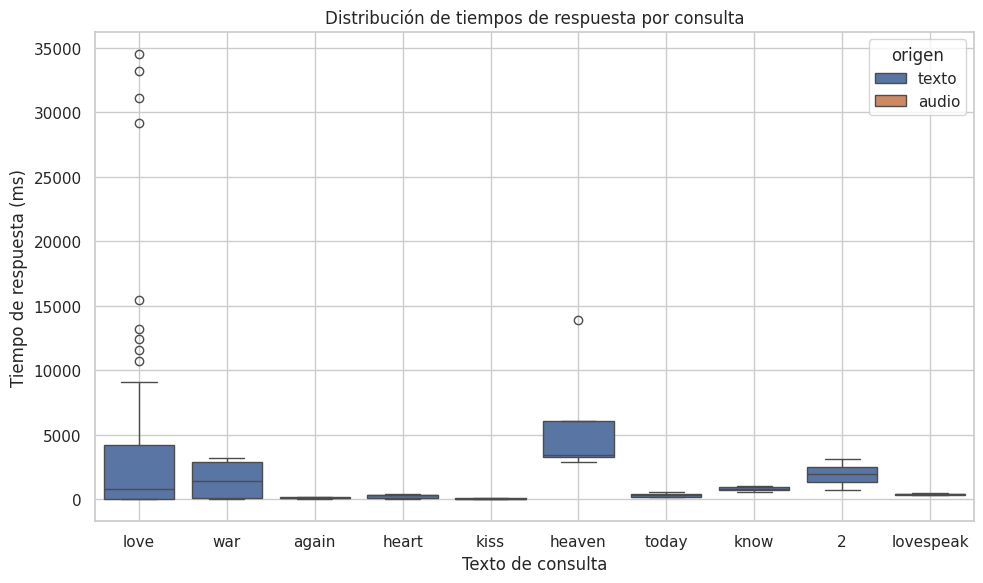

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_total, x="query_text", y="tiempo_respuesta", hue="origen")
plt.title("Distribución de tiempos de respuesta por consulta")
plt.ylabel("Tiempo de respuesta (ms)")
plt.xlabel("Texto de consulta")
plt.grid(True)
plt.tight_layout()
plt.show()


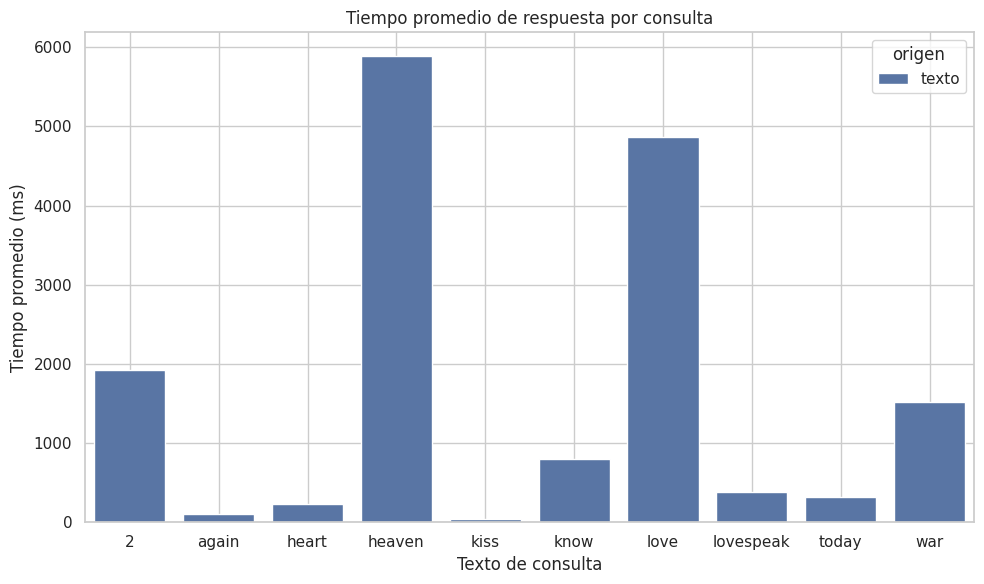

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=agg_stats, x="query_text", y="mean", hue="origen")
plt.title("Tiempo promedio de respuesta por consulta")
plt.ylabel("Tiempo promedio (ms)")
plt.xlabel("Texto de consulta")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_366681/903433583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_audio, x="metodo", y="tiempo_respuesta", palette="Set2")


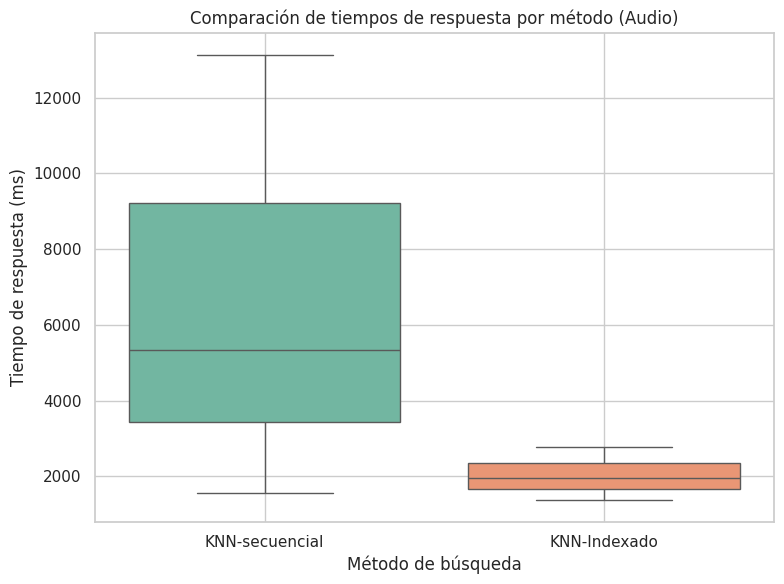

,count,mean,std,min,25%,50%,75%,max
metodo,,,,,,,,
KNN-Indexado,3.0,2039.493333,700.343959,1388.15,1669.115,1950.08,2365.165,2780.25
KNN-secuencial,3.0,6669.256667,5903.097534,1549.22,3440.820,5332.42,9229.275,13126.13


In [21]:
df_audio = df_total[df_total["origen"] == "audio"]

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_audio, x="metodo", y="tiempo_respuesta", palette="Set2")
plt.title("Comparación de tiempos de respuesta por método (Audio)")
plt.xlabel("Método de búsqueda")
plt.ylabel("Tiempo de respuesta (ms)")
plt.grid(True)
plt.tight_layout()
plt.show()

df_audio.groupby("metodo")["tiempo_respuesta"].describe()
